<H5>Evaluating the Model</H5>

In [14]:
from fastai.vision.all import *
from torchvision.models import resnet34
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path

In [15]:
# Function to load the model
def load_model(model_path, model_name):
    dls = ImageDataLoaders.from_folder('Dataset', train='Train', valid='Test',
                                       item_tfms=Resize(224), batch_tfms=aug_transforms())
    learn = vision_learner(dls, resnet34, pretrained=True, metrics=accuracy)
    learn.load(f'{model_path}/{model_name}')
    return learn

# Function to predict kidney stones in an image
def predict_image(learn, img_path):
    img = PILImage.create(img_path)
    pred, pred_idx, probs = learn.predict(img)
    return pred, pred_idx, probs[pred_idx].item()

In [12]:
# Model path
model_path = Path(r'C:\Users\vishn\Desktop\B.Tech - College Chetha\Vignana Pradarshanalu\GitHub Codes\Kidney_Stone_detection\Saved_Models\models')
model_name = 'Mark_IV_epoch_10'
learn = load_model(model_path, model_name)

In [27]:
# Input image path
img_path = r'C:\Users\vishn\Desktop\B.Tech - College Chetha\Vignana Pradarshanalu\GitHub Codes\Kidney_Stone_detection\Dataset\Test\Kidney_stone\1.3.46.670589.33.1.63729207954780985300001.5126527407041426119.png'

In [28]:
# Perform prediction
pred, pred_idx, prob = predict_image(learn, img_path)

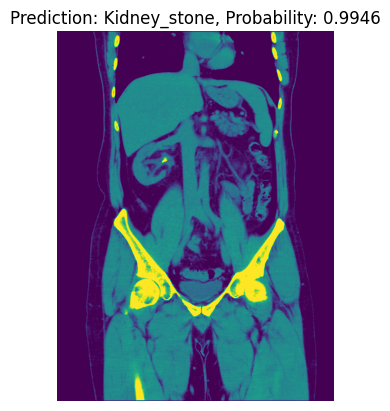

The model predicts the presence of kidney stones as: Kidney_stone with a probability of 0.9946


In [29]:
# Display the input image and prediction
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {pred}, Probability: {prob:.4f}')
plt.show()

print(f'The model predicts the presence of kidney stones as: {pred} with a probability of {prob:.4f}')

In [30]:
# Evaluate the model on the test set
valid_dl = learn.dls.valid
preds, targs = learn.get_preds(dl=valid_dl)
pred_classes = preds.argmax(dim=1)

In [31]:
# Calculate precision, recall, and F1 score
precision = precision_score(targs, pred_classes, average='weighted')
recall = recall_score(targs, pred_classes, average='weighted')
f1 = f1_score(targs, pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9383
Recall: 0.9364
F1 Score: 0.9362


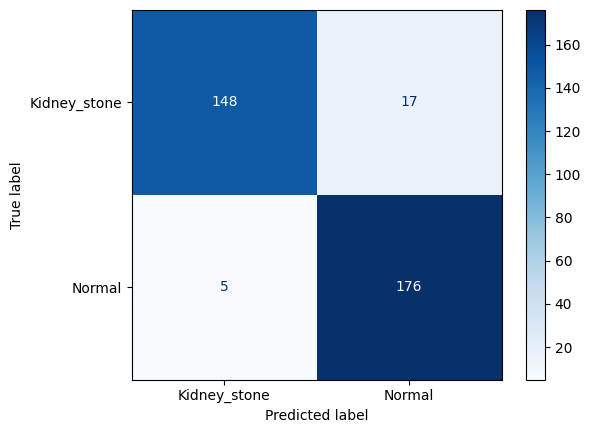

In [32]:
# Generate and display the confusion matrix
cm = confusion_matrix(targs, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=learn.dls.vocab)
disp.plot(cmap=plt.cm.Blues)
plt.show()

<Hr>